In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.base import BaseEstimator

In [3]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,x,y=None):
        pass

    def predict(self,x):
        pred = np.zeros((x.shape[0],1))
        for i in range (x.shape[0]):
            # print(pred)
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],
            inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
df = pd.read_csv('train.csv')
y = df['Survived']
x = df.drop(columns='Survived')
x = transform_features(x)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=11)

In [7]:
myclf = MyDummyClassifier()
myclf.fit(x_train,y_train)

pred = myclf.predict(x_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, pred)))

Dummy Classifier의 정확도는: 0.8324


In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test, pred)

array([[103,  15],
       [ 15,  46]], dtype=int64)

In [10]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}')

In [11]:
get_clf_eval(y_test,pred)

오차행렬
[[103  15]
 [ 15  46]]
정확도:0.8324, 정밀도:0.7541, 재현율:0.7541


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869


In [14]:
pred_proba = lr_clf.predict_proba(x_test)
np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)

array([[0.46205513, 0.53794487, 1.        ],
       [0.87870787, 0.12129213, 0.        ],
       [0.8771721 , 0.1228279 , 0.        ],
       [0.88256572, 0.11743428, 0.        ],
       [0.85532099, 0.14467901, 0.        ],
       [0.88220231, 0.11779769, 0.        ],
       [0.88844831, 0.11155169, 0.        ],
       [0.20872256, 0.79127744, 1.        ],
       [0.78289451, 0.21710549, 0.        ],
       [0.3691594 , 0.6308406 , 1.        ],
       [0.89977   , 0.10023   , 0.        ],
       [0.87507533, 0.12492467, 0.        ],
       [0.87716612, 0.12283388, 0.        ],
       [0.88840241, 0.11159759, 0.        ],
       [0.43681649, 0.56318351, 1.        ],
       [0.85901797, 0.14098203, 0.        ],
       [0.90375725, 0.09624275, 0.        ],
       [0.73338708, 0.26661292, 0.        ],
       [0.72483711, 0.27516289, 0.        ],
       [0.17151769, 0.82848231, 1.        ],
       [0.75356422, 0.24643578, 0.        ],
       [0.61903536, 0.38096464, 0.        ],
       [0.

In [15]:
from sklearn.preprocessing import Binarizer

In [16]:
x = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1) # 1.1보다작으면0 1.1보다크면1
binarizer.fit_transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [17]:
binarizer = Binarizer(threshold=0.6)
pred_1 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

In [18]:
get_clf_eval(y_test,pred_1)
# 0.5일때
# 오차행렬
# [[104  14]
#  [ 13  48]]
# 정확도:0.8492, 정밀도:0.7742, 재현율:0.7869

# 0.4일때 threshold=0.5에비해 정확도,정밀도떨어지고 재현율오름
# 오차행렬
# [[98 20]
#  [10 51]]
# 정확도:0.8324, 정밀도:0.7183, 재현율:0.8361

# 0.6일때는 threshold=0.4에비해 정확도정밀도 오르고 재현율떨어짐
# 오차행렬
# [[112   6]
#  [ 16  45]]
# 정확도:0.8771, 정밀도:0.8824, 재현율:0.7377

오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377


정밀도/재현율 트레이드오프 pdf 3장 13페이지
분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다.

In [19]:
# 5/10 수요일

In [20]:
from sklearn.metrics import precision_recall_curve

In [21]:
pred_proba[:,1]

array([0.53794487, 0.12129213, 0.1228279 , 0.11743428, 0.14467901,
       0.11779769, 0.11155169, 0.79127744, 0.21710549, 0.6308406 ,
       0.10023   , 0.12492467, 0.12283388, 0.11159759, 0.56318351,
       0.14098203, 0.09624275, 0.26661292, 0.27516289, 0.82848231,
       0.24643578, 0.38096464, 0.14534303, 0.18531745, 0.1119683 ,
       0.2345286 , 0.14037267, 0.07418616, 0.28043951, 0.30441872,
       0.9472107 , 0.817234  , 0.12688423, 0.82625054, 0.39940319,
       0.2345286 , 0.07239036, 0.61091012, 0.05289147, 0.10389269,
       0.35098111, 0.08339846, 0.8217043 , 0.70777205, 0.6304673 ,
       0.63048359, 0.91889512, 0.35928397, 0.94886658, 0.11200283,
       0.59250135, 0.11159759, 0.13275754, 0.72538663, 0.30936364,
       0.19710502, 0.22631122, 0.12282894, 0.15416232, 0.43250532,
       0.28014758, 0.10070325, 0.54528179, 0.51436948, 0.44422098,
       0.09457784, 0.66672732, 0.59406032, 0.95181982, 0.14821989,
       0.12881476, 0.16840092, 0.10389494, 0.94798868, 0.19866

In [22]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

In [23]:
precision_recall_curve(y_test,pred_proba[:,1])

(array([0.34078212, 0.34269663, 0.34463277, 0.34659091, 0.34857143,
        0.35057471, 0.35260116, 0.35465116, 0.35672515, 0.35882353,
        0.36094675, 0.36309524, 0.36526946, 0.36746988, 0.36969697,
        0.37195122, 0.37423313, 0.37654321, 0.37888199, 0.38125   ,
        0.3836478 , 0.38607595, 0.38853503, 0.38461538, 0.38709677,
        0.38961039, 0.38562092, 0.38815789, 0.39333333, 0.39864865,
        0.41549296, 0.42142857, 0.42446043, 0.42753623, 0.43065693,
        0.43382353, 0.43703704, 0.44029851, 0.43609023, 0.43939394,
        0.44274809, 0.44186047, 0.4453125 , 0.4488189 , 0.45238095,
        0.448     , 0.4516129 , 0.44715447, 0.45081967, 0.45454545,
        0.45833333, 0.46218487, 0.46610169, 0.47008547, 0.47413793,
        0.47826087, 0.48245614, 0.48672566, 0.49107143, 0.5       ,
        0.50458716, 0.50925926, 0.51401869, 0.51886792, 0.52380952,
        0.52884615, 0.53398058, 0.53921569, 0.54455446, 0.55      ,
        0.55555556, 0.56122449, 0.56701031, 0.57

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

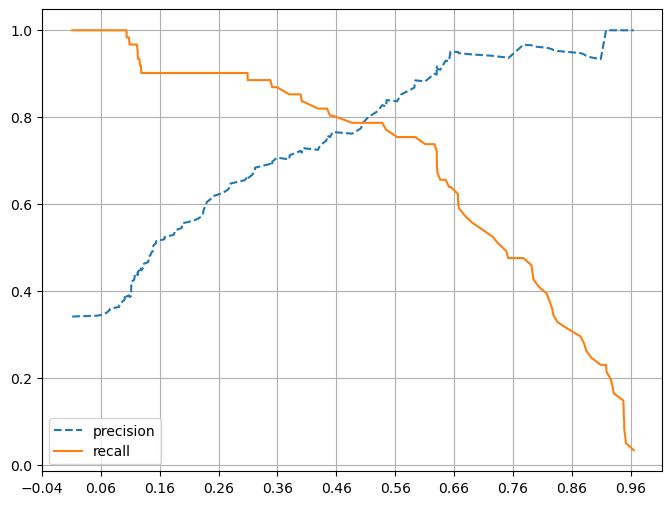

In [25]:
def precision_recall_curve_plot(y_test,pred_proba):
    precisions,recalls,thresholds = precision_recall_curve(y_test,
                                                           pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,
             precisions[0:threshold_boundary],
             linestyle='--',
             label='precision')
    plt.plot(thresholds,
             recalls[0:threshold_boundary],
             label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round( np.arange(start,end,0.1) , 2))
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,pred_proba[:,1])

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_test,pred)

0.7804878048780488

In [73]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred) #pred_proba를쓰면 auc값동일하게나옴(pred의 1열데이터들만사용하기때문에)
                                               #그래서pred를 써야함
    print('오차행렬')
    print(confusion)
    print(f'''정확도:{accuracy:.4f},
정밀도:{precision:.4f},
재현율:{recall:.4f},
f1:{f1:.4f},
AUC:{roc_auc:.4f}
------------------------''')
    
def get_eval_by_threshold(y_test,pred_proba,thresholds):
    from sklearn.preprocessing import Binarizer
    for threshold in thresholds:
        pred = Binarizer(threshold=threshold).fit_transform(pred_proba)
        print('임계값:',threshold)
        get_clf_eval(y_test,pred,pred_proba)

In [74]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(x_test)[:,1].reshape(-1,1) # reshape안해주면에러뜸
get_eval_by_threshold(y_test,pred_proba,thresholds)

임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324,
정밀도:0.7183,
재현율:0.8361,
f1:0.7727,
AUC:0.8333
------------------------
임계값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492,
정밀도:0.7656,
재현율:0.8033,
f1:0.7840,
AUC:0.8381
------------------------
임계값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,
정밀도:0.7742,
재현율:0.7869,
f1:0.7805,
AUC:0.8341
------------------------
임계값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659,
정밀도:0.8364,
재현율:0.7541,
f1:0.7931,
AUC:0.8389
------------------------
임계값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771,
정밀도:0.8824,
재현율:0.7377,
f1:0.8036,
AUC:0.8434
------------------------


In [30]:
from sklearn.metrics import roc_curve

In [31]:
roc_curve(y_test,pred_proba)

(array([0.        , 0.        , 0.        , 0.00847458, 0.00847458,
        0.01694915, 0.01694915, 0.02542373, 0.02542373, 0.03389831,
        0.03389831, 0.03389831, 0.04237288, 0.04237288, 0.05084746,
        0.05084746, 0.07627119, 0.07627119, 0.08474576, 0.08474576,
        0.12711864, 0.12711864, 0.13559322, 0.13559322, 0.16101695,
        0.16101695, 0.16949153, 0.16949153, 0.18644068, 0.18644068,
        0.20338983, 0.20338983, 0.23728814, 0.23728814, 0.30508475,
        0.33050847, 0.46610169, 0.48305085, 0.57627119, 0.57627119,
        0.58474576, 0.58474576, 0.61016949, 0.61864407, 0.63559322,
        0.63559322, 0.68644068, 0.70338983, 0.75423729, 0.78813559,
        0.79661017, 0.79661017, 0.81355932, 0.81355932, 1.        ]),
 array([0.        , 0.03278689, 0.2295082 , 0.2295082 , 0.47540984,
        0.47540984, 0.63934426, 0.63934426, 0.6557377 , 0.6557377 ,
        0.68852459, 0.72131148, 0.72131148, 0.73770492, 0.73770492,
        0.75409836, 0.75409836, 0.7704918 , 0.

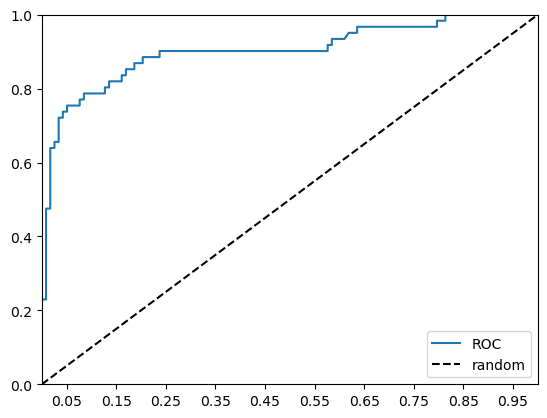

In [32]:
def roc_curve_plot(y_test,pred_proba):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='random')
    start,end = plt.xlim()
    plt.xticks(np.round( np.arange(start,end,0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test,pred_proba)

In [80]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'''정확도:{accuracy:.4f},
정밀도:{precision:.4f},
재현율:{recall:.4f},
f1:{f1:.4f},
AUC:{roc_auc:.4f}
------------------------''')
    
def get_eval_by_threshold(y_test,pred_proba,thresholds):
    from sklearn.preprocessing import Binarizer
    for threshold in thresholds:
        pred = Binarizer(threshold=threshold).fit_transform(pred_proba)
        print('임계값:',threshold)
        get_clf_eval(y_test,pred,pred_proba)

In [81]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    from sklearn.preprocessing import Binarizer
    from sklearn.metrics import roc_auc_score

    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        pred = binarizer.fit_transform(pred_proba)
        roc_auc = roc_auc_score(y_test, pred_proba)
        
        print(f'임계값: {threshold:.2f}, AUC: {roc_auc:.4f}')

# pred_proba는 pred의 1열의 데이터들만사용하기때문에 auc값이 동일하게나옴옴

In [83]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(x_test)[:,1].reshape(-1,1) # reshape안해주면에러뜸
get_eval_by_threshold(y_test,pred_proba,thresholds)

임계값: 0.40, AUC: 0.9024
임계값: 0.45, AUC: 0.9024
임계값: 0.50, AUC: 0.9024
임계값: 0.55, AUC: 0.9024
임계값: 0.60, AUC: 0.9024


In [84]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [79]:
pred_proba

array([[0.53794487],
       [0.12129213],
       [0.1228279 ],
       [0.11743428],
       [0.14467901],
       [0.11779769],
       [0.11155169],
       [0.79127744],
       [0.21710549],
       [0.6308406 ],
       [0.10023   ],
       [0.12492467],
       [0.12283388],
       [0.11159759],
       [0.56318351],
       [0.14098203],
       [0.09624275],
       [0.26661292],
       [0.27516289],
       [0.82848231],
       [0.24643578],
       [0.38096464],
       [0.14534303],
       [0.18531745],
       [0.1119683 ],
       [0.2345286 ],
       [0.14037267],
       [0.07418616],
       [0.28043951],
       [0.30441872],
       [0.9472107 ],
       [0.817234  ],
       [0.12688423],
       [0.82625054],
       [0.39940319],
       [0.2345286 ],
       [0.07239036],
       [0.61091012],
       [0.05289147],
       [0.10389269],
       [0.35098111],
       [0.08339846],
       [0.8217043 ],
       [0.70777205],
       [0.6304673 ],
       [0.63048359],
       [0.91889512],
       [0.359